<a href="https://colab.research.google.com/github/sanada5/Simulation-of-mathematical-models-of-decision-making/blob/main/Cube_model_with_three_alternatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cube model with three alternatives

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
import seaborn as sns
import pandas as pd

Wiener Process;

-Wiener(n, 3, T).T[0]- the first independent Wiener proces

-Wiener(n, 3, T). T[1]- the second independent Wiener process

-Wiener(n, 3, T). T[2]- the third independent Wiener process

In [ ]:
def Wiener(n, d, T):  #n is the number of time steps, d is the dimension of the Wiener process and T is the end time of simulation
    times=np.linspace(0, T, n)  #equally distanced n time steps
    dt=times[1]-times[0]
    dB=np.sqrt(dt)*np.random.normal(size=(n-1, d)) #dB=Wt2-Wt1 has a normal distribution with mean 0 and variance t2-t1=dt
    B0=np.zeros(shape=(1,d))    #Wiener process starts at 0
    B=np.concatenate((B0,np.cumsum(dB, axis=0)), axis=0) #to find the Wt1, we add up all dThe choice probabilities for option 1, option 2, and fall-back option are 0.497, 0.135, and 0.368 respectively. The mean of reaction time is 0.6320399353300998.ifferences till Wt1-W(t1-dt)
    return B

In [ ]:
#components of drift vector (mu1, mu2, mu3) and sigma matrix np.array([s11, 0, 0],[0, s22, 0],[0, 0, s33])
#time=ending time of the process
#N=number of simulations (for loop)
#n is the number of steps of the time, d is the dimension of the Wiener process
#which in our case is 2
#(mu1, mu2) is the drift vector
#Sigma matrix is a diagonal matrix: ((s11, 0),(0, s22))
def Cubemodel(time,N,n, d, mu1, mu2,mu3, s11, s22,s33): #n is the number of time steps, d is the dimension
    times=np.linspace(0, time, n)   #timestep is time/n
    result={"Option1":0, "Option2":0, "Option3":0} #dictionary to keep record of the times each of the option is chosen
    worst_best={"A1A2A3":0, "A1A3A2":0, "A2A1A3":0, "A2A3A1":0, "A3A1A2":0, "A3A2A1":0}
    stopping_times=[]
    episodes=np.zeros((2, N))  #record the time each episode of the process ends
    times_A1_favorite=[]
    times_A2_favorite=[]
    times_A3_favorite=[]
    times_A1_least_favorite=[]
    times_A2_least_favorite=[]
    times_A3_least_favorite=[]
    for i in range(N):
        #X(t)=(X1(t), X2(t))
        #X1=mu1*t+s11*W1
        X1=np.ones(n)*mu1*times+s11*np.ones(n)*np.array(Wiener(n, d, time).T[0]) #array code which finds the value of X1 for each t in times
        #X2=mu2*t+s22*W2,
        X2=np.ones(n)*mu2*times+s22*np.ones(n)*np.array(Wiener(n, d, time).T[1])  #array code which finds the value of X2 for each t in times
        X3=np.ones(n)*mu3*times+s33*np.ones(n)*np.array(Wiener(n, d, time).T[2])  #array code which finds the value of X2 for each t in times
        X1new=abs(X1)  #make every value in X1 absolute
        X2new=abs(X2)  #make every value in X2 absolute
        X3new=abs(X3)
        a=[k for k in X1new if k>=1]  #obtain those indices of values in X1 whose absolute value is >=1
        b=[k for k in X2new if k>=1]  #obtain those indices of values in X2 whose
        c=[k for k in X3new if k>=1]
        k1=list(X1new).index(a[0])   #find the first element in X1 whose absolute value is >=1
        k2=list(X2new).index(b[0])    #find the first element in X2 whose absolute value is >=1
        k3=list(X3new).index(c[0])
        k=min(k1,k2,k3)
        m1=X1[k]
        m2=X2[k]
        m3=X3[k]
    #possible cases
        if m1>=1:   #if the accept boundary of the first option is hit, we are done
            result["Option1"]+=1
            stopping_times.append(times[k])
            episodes[0,i]=times[k]
            times_A1_favorite.append(times[k])
            X2_11=m2*np.ones(n)+np.ones(n)*mu2*times+s22*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X3_11=m3*np.ones(n)+np.ones(n)*mu3*times+s33*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X2new11=abs(X2_11)
            X3new11=abs(X3_11)
            a=[k for k in X2new11 if k>=1]
            b=[k for k in X3new11 if k>=1]
            k11=list(X2new11).index(a[0])
            k21=list(X3new11).index(b[0])
            k_init=min(k11,k21)
            if X2_11[k_init]>=1 or X3_11[k_init]<=-1:  #if the accept boundary of the second option is hit, then this option is chosen
                worst_best["A1A2A3"]+=1
                episodes[1,i]=0
                times_A3_least_favorite.append(times[k_init]+times[k])
            else:
                worst_best["A1A3A2"]+=1
                episodes[1,i]=0
                times_A2_least_favorite.append(times[k_init]+times[k])
        elif m2>=1:   #if the accept boundary of the second option is hit, we are done
            result["Option2"]+=1
            stopping_times.append(times[k])
            times_A2_favorite.append(times[k])
            episodes[0,i]=times[k]
            X1_11=m1*np.ones(n)+np.ones(n)*mu1*times+s11*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X3_22=m3*np.ones(n)+np.ones(n)*mu3*times+s33*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X1new11=abs(X1_11)
            X3new22=abs(X3_22)
            a=[k for k in X1new11 if k>=1]
            b=[k for k in X3new22 if k>=1]
            k1=list(X1new11).index(a[0])
            k2=list(X3new22).index(b[0])
            k22=min(k1,k2)

            if X1_11[k22]>=1 or X3_22[k22]<=-1:
                worst_best["A2A1A3"]+=1
                episodes[1,i]=0
                times_A3_least_favorite.append(times[k22]+times[k])
            else:
                worst_best["A2A3A1"]+=1
                episodes[1,i]=0
                times_A1_least_favorite.append(times[k22]+times[k])
        elif m3>=1:   #if the accept boundary of the second option is hit, we are done
            result["Option3"]+=1
            stopping_times.append(times[k])
            times_A3_favorite.append(times[k])
            episodes[0,i]=times[k]
            X1_22=m1*np.ones(n)+np.ones(n)*mu1*times+s11*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X2_22=m2*np.ones(n)+np.ones(n)*mu2*times+s22*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X1new22=abs(X1_22)
            X2new22=abs(X2_22)
            a=[k for k in X1new22 if k>=1]
            b=[k for k in X2new22 if k>=1]
            k1=list(X1new22).index(a[0])
            k2=list(X2new22).index(b[0])
            k33=min(k1,k2)
            if X1_22[k33]>=1 or X2_22[k33]<=-1:
                worst_best["A3A1A2"]+=1
                episodes[1,i]=0
                times_A2_least_favorite.append(times[k]+times[k33])
            else:
                worst_best["A3A2A1"]+=1
                episodes[1,i]=0
                times_A1_least_favorite.append(times[k]+times[k33])
        elif m1<=-1:      #if the reject boundary of the first option is hit, we have the one dimensional Wiener process with drift concerning the second component
            X2_1=m2*np.ones(n)+np.ones(n)*mu2*times+s22*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X3_1=m3*np.ones(n)+np.ones(n)*mu3*times+s33*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X2new1=abs(X2_1)
            X3new1=abs(X3_1)
            a=[k for k in X2new1 if k>=1]
            b=[k for k in X3new1 if k>=1]
            k1=list(X2new1).index(a[0])
            k2=list(X3new1).index(b[0])
            k11=min(k1,k2)
            episodes[0,i]=times[k]
            times_A1_least_favorite.append(times[k])
             #find the first element in X2 whose absolute value is >=1
            if X2_1[k11]>=1 or X3_1[k11]<=-1:  #if the accept boundary of the second option is hit, then this option is chosen
                result["Option2"]+=1
                stopping_times.append(times[k]+times[k11])
                worst_best["A2A3A1"]+=1
                episodes[1,i]=times[k11]
                times_A2_favorite.append(times[k]+times[k11])
            elif X2_1[k11]<=-1 or X3_1[k11]>=1:
                result["Option3"]+=1
                stopping_times.append(times[k]+times[k11])   #one is left with the Fall back option
                worst_best["A3A2A1"]+=1
                episodes[1,i]=times[k11]
                times_A3_favorite.append(times[k]+times[k11])
        elif X2[k]<=-1:      #if the reject boun1dary of the first option is hit, we have the one dimensional Wiener process with drift concerning the second component
            X1_1=m1*np.ones(n)+np.ones(n)*mu1*times+s11*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X3_2=m3*np.ones(n)+np.ones(n)*mu3*times+s33*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X1new1=abs(X1_1)
            X3new2=abs(X3_2)
            a=[k for k in X1new1 if k>=1]
            b=[k for k in X3new2 if k>=1]
            k1=list(X1new1).index(a[0])
            k2=list(X3new2).index(b[0])
            k22=min(k1,k2)
            episodes[0,i]=times[k]
            times_A2_least_favorite.append(times[k])
             #find the first element in X2 whose absolute value is >=1
            if X1_1[k22]>=1 or X3_2[k22]<=-1:  #if the accept boundary of the second option is hit, then this option is chosen
                result["Option1"]+=1
                stopping_times.append(times[k]+times[k22])
                worst_best["A1A3A2"]+=1
                episodes[1,i]=times[k22]
                times_A1_favorite.append(times[k22]+times[k])
            elif X1_1[k22]<=-1 or X3_2[k22]>=1:
                result["Option3"]+=1
                stopping_times.append(times[k]+times[k22])   #one is left with the Fall back option
                worst_best["A3A1A2"]+=1
                episodes[1,i]=times[k22]
                times_A3_favorite.append(times[k]+times[k22])
        elif X3[k]<=-1:      #if the reject boundary of the first option is hit, we have the one dimensional Wiener process with drift concerning the second component
            X1_2=m1*np.ones(n)+np.ones(n)*mu1*times+s11*np.ones(n)*np.array(Wiener(n, d-1, time).T[0])
            X2_2=m2*np.ones(n)+np.ones(n)*mu2*times+s22*np.ones(n)*np.array(Wiener(n, d-1, time).T[1])
            X1new2=abs(X1_2)
            X2new2=abs(X2_2)
            a=[k for k in X1new2 if k>=1]
            b=[k for k in X2new2 if k>=1]
            k1=list(X1new2).index(a[0])
            k2=list(X2new2).index(b[0])
            k33=min(k1,k2)
            episodes[0,i]=times[k]
            times_A3_least_favorite.append(times[k33])
             #find the first element in X2 whose absolute value is >=1
            if X1_2[k33]>=1 or X2_2[k33]<=-1:  #if the accept boundary of the second option is hit, then this option is chosen
                result["Option1"]+=1
                stopping_times.append(times[k]+times[k33])
                worst_best["A1A2A3"]+=1
                episodes[1,i]=times[k33]
                times_A1_favorite.append(times[k]+times[k33])
            elif X1_2[k33]<=-1 or X2_2[k33]>=1:
                result["Option2"]+=1
                stopping_times.append(times[k]+times[k33])   #one is left with the Fall back option
                worst_best["A2A1A3"]+=1
                episodes[1,i]=times[k33]
                times_A2_favorite.append(times[k]+times[k33])
    data=[[worst_best["A1A2A3"]/N, worst_best["A1A3A2"]/N,worst_best["A2A1A3"]/N, worst_best["A2A3A1"]/N,worst_best["A3A1A2"]/N, worst_best["A3A2A1"]/N],[np.mean(times_A1_favorite), np.mean(times_A2_favorite), np.mean(times_A3_favorite)],[np.mean(times_A1_least_favorite), np.mean(times_A2_least_favorite), np.mean(times_A3_least_favorite)]]
    return "The choice probabilities for option 1, option 2, and option 3 are {}, {}, and {} respectively. The mean of the reaction time is {}".format(result["Option1"]/N, result["Option2"]/N, result["Option3"]/N, np.mean(stopping_times)), stopping_times, data, episodes, "The average durations of the first and second episode of the process are {} and {} respectively".format(np.mean(episodes[0]), np.mean(episodes[1]))

In [ ]:
summary, reaction_time, worst_best, episodes, info_episodes=Cubemodel(500, 3000, 50000, 3, 0, 0, 0, 1, 1, 1)  #drift vector=0, simga matrix=I

Find the choice probability for each of the three options and mean of the reaction time of the process

In [ ]:
summary

'The choice probabilities for option 1, option 2, and option 3 are 0.34, 0.33, and 0.33 respectively. The mean of the reaction time is 0.7230777948892311'

Display the probability distribution of the reaction time random variable:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


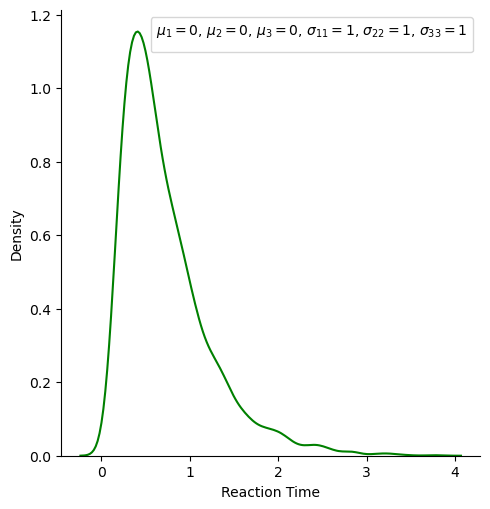

In [ ]:
sns.displot(data=reaction_time,kind='kde', color='green')
plt.xlabel('Reaction Time')
plt.ylabel('Density')
plt.legend(title=r"$\mu_{1}=0$, $\mu_{2}=0$, $\mu_{3}=0$, $\sigma_{11}=1$, $\sigma_{22}=1$, $\sigma_{33}=1$")
plt.show()

Find the choice probabilities of each of worst-best scenarios and of these possibilities describing each of the options as being the most/least preferred, and the corresponding mean time:

In [ ]:
head1=["P[A1A2A3]".translate(SUB), "P[A1A3A2]".translate(SUB), "P[A2A1A3]".translate(SUB), "P[A2A3A1]".translate(SUB), "P[A3A1A2]".translate(SUB), "P[A3A2A1]".translate(SUB)]
mydata1=[worst_best[0]] #the probabilities of each of the worst_best scenarios
df1=pd.DataFrame(mydata1, columns=head1)
df1

,P[A₁A₂A₃],P[A₁A₃A₂],P[A₂A₁A₃],P[A₂A₃A₁],P[A₃A₁A₂],P[A₃A₂A₁]
0,0.163,0.177,0.162667,0.167333,0.166,0.164


In [ ]:
head2=["P[A1 is the most preferred option]".translate(SUB), "P[A2 is the most preferred option]".translate(SUB), "P[A3 is the most preferred option]".translate(SUB)]
mydata2=[[worst_best[0][0]+worst_best[0][1],worst_best[0][2]+worst_best[0][3], worst_best[0][4]+worst_best[0][5]]] #the probabilities for the scenarios where options A1, A2, F are the most preferred ones
df2=pd.DataFrame(mydata2, columns=head2)
df2

,P[A₁ is the most preferred option],P[A₂ is the most preferred option],P[A₃ is the most preferred option]
0,0.34,0.33,0.33


In [ ]:
head3=["P[A1 is the least preferred option]".translate(SUB), "P[A2 is the least preferred option]".translate(SUB), "P[A3 is the least preferred option]".translate(SUB)]
mydata3=[[worst_best[0][3]+worst_best[0][5],worst_best[0][1]+worst_best[0][4],worst_best[0][2]+worst_best[0][0]]]  #the probabilities for the scenarios where options A1, A2, F are the most preferred ones
df3=pd.DataFrame(mydata3, columns=head3)
df3

,P[A₁ is the least preferred option],P[A₂ is the least preferred option],P[A₃ is the least preferred option]
0,0.331333,0.343,0.325667


In [ ]:
head4=["A1 most preferred / mean time".translate(SUB),"A2 most preferred / mean time".translate(SUB),"A3 most preferred / mean time".translate(SUB)]
mydata4=[worst_best[1]]  #the mean of the times determining the choice of options A1, A2, F as the most preferred one respectively
df4=pd.DataFrame(mydata4, columns=head4)
df4

,A₁ most preferred / mean time,A₂ most preferred / mean time,A₃ most preferred / mean time
0,0.74874,0.701489,0.718226


In [ ]:
head5=["A1 least preferred / mean time".translate(SUB),"A2 least preferred / mean time".translate(SUB),"A3 least preferred / mean time".translate(SUB)]  #the mean of the times determining the choice of options A1, A2, F as the most preferred one respectively
mydata5=[worst_best[2]]
df5=pd.DataFrame(mydata2, columns=head5)
df5

,A₁ least preferred / mean time,A₂ least preferred / mean time,A₃ least preferred / mean time
0,0.34,0.33,0.33


Find the mean of the stopping times in each episode:

In [ ]:
info_episodes

'The average durations of the first and second episode of the process are 0.5043467536017388 and 0.2187310412874924 respectively'

Distribution of stopping times of each episode

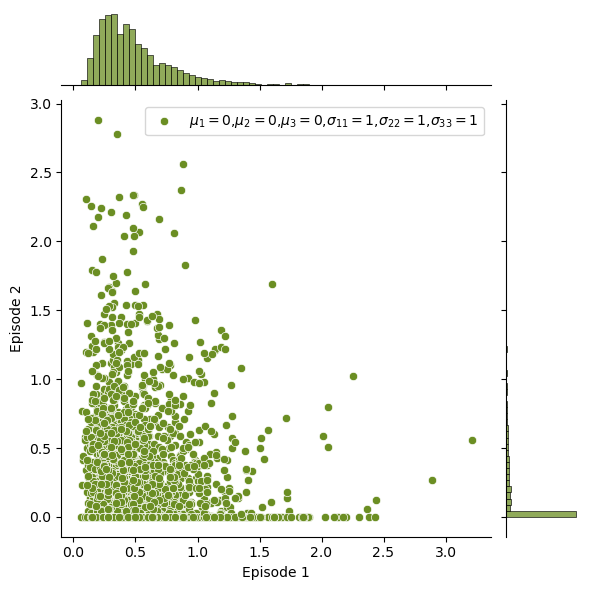

In [ ]:
episodes_new_Cube3=pd.DataFrame({"Episode 1": episodes[0], "Episode 2": episodes[1]})
sns.jointplot(x="Episode 1",y="Episode 2", data=episodes_new_Cube3,color="olivedrab",label=r"$\mu_{1}=0$,$\mu_{2}=0$,$\mu_{3}=0$,$\sigma_{11}=1$,$\sigma_{22}=1$,$\sigma_{33}=1$")
plt.legend()